In [3]:
def translate(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
    {
        "role": "system",
        "content": "You will be provided with a verb in Moroccan Darija language." +
        "Your task is to translate it into English and provide only its lemma as an output." + 
                    "The lemma of the translated verb should not contain 'to'."
    },
    {
        "role": "user", 
        "content":  f'{verb}' 
    }
            ], 
        temperature=0.1  
        )
    return completion.choices[0].message.content
df['transl'] = df['n1'].apply(translate)

print(df['transl'])

0              eat
1              buy
2            enter
3             exit
4       understand
           ...    
1027        arrive
1028        invite
1029            go
1030       scratch
1031        search
Name: transl, Length: 1032, dtype: object


In [1]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util

dataset = df.copy()

columns_to_delete = ['n2', 'n3', 'n4', 'n5', 'n6']
dataset.drop(columns=columns_to_delete, inplace=True)

eng = dataset['eng']
transl = dataset['english_translation']


model_name = 'bert-base-nli-mean-tokens'
# Load a pre-trained SentenceTransformer model
model = SentenceTransformer(model_name)
results = []
def evaluate_pairs(transl, eng, threshold=0.7):
    for i in range(len(transl)):
        sentence1, sentence2 = transl[i], eng[i]
        embedding1 = model.encode(sentence1, convert_to_tensor=True)
        embedding2 = model.encode(sentence2, convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(embedding1, embedding2)
        results.append((i+2, sentence1, sentence2, similarity.item(), similarity.item() >= threshold))
    return results
results = evaluate_pairs(transl, eng)
print(results)


similarities = [item[2] for item in results]

dataset['similarity'] = similarities
mean_similarity = dataset['similarity'].mean()


print(f'Mean value of similarities is: {mean_similarity}')
dataset.describe()

c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'df' is not defined

Average similarity: 0.36%
Count of pairs in the interval 90-100%: 141


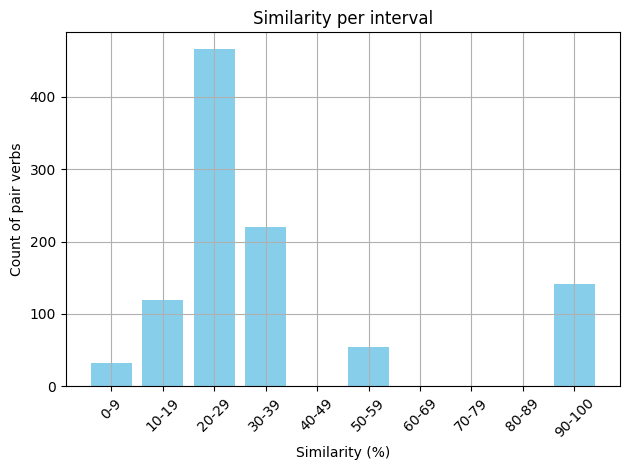

In [ ]:
import matplotlib.pyplot as plt

dataset.hist(bins=50, figsize=(10,5))
plt.xlabel('Similarity (%)')
plt.ylabel('Count of pair verbs')
plt.title('Similarity histogram')
plt.tight_layout()
plt.grid(True)
plt.show()